In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
import os
os.chdir('D://DKIT//dissertation//Dataset_of_Tomato_Leaves//plantvillage//Preprocessed_data//64//vector//')

In [3]:
#reading numpy array data
pixels = np.load('rgb_data.npy')
#reading csv file
data = pd.read_csv('rgb_data.csv')

In [4]:
features = pd.DataFrame(pixels)
features = features.values

In [5]:
features

array([[143, 147, 146, ..., 123, 113, 112],
       [178, 172, 172, ..., 138, 124, 123],
       [125, 129, 106, ...,  61,  53,  51],
       ...,
       [130, 115, 118, ..., 127, 127, 129],
       [179, 168, 176, ..., 126, 113, 122],
       [114,  99, 102, ..., 205, 191, 188]], dtype=uint8)

In [6]:
target = data['disease']

In [7]:
target

0                 bacterial_spot
1                 bacterial_spot
2                 bacterial_spot
3                 bacterial_spot
4                 bacterial_spot
                  ...           
14526    two-spotted_spider_mite
14527    two-spotted_spider_mite
14528    two-spotted_spider_mite
14529    two-spotted_spider_mite
14530    two-spotted_spider_mite
Name: disease, Length: 14531, dtype: object

In [8]:
target = target.values

In [9]:
target = target.reshape(14531, 1)

In [10]:
target

array([['bacterial_spot'],
       ['bacterial_spot'],
       ['bacterial_spot'],
       ...,
       ['two-spotted_spider_mite'],
       ['two-spotted_spider_mite'],
       ['two-spotted_spider_mite']], dtype=object)

In [11]:
#splitting the data to test and train
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(features,target, test_size=0.20, random_state=24)

In [12]:
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

In [13]:
xtrain = xtrain.reshape(xtrain.shape[0], 64, 64, 3)
xtest = xtest.reshape(xtest.shape[0], 64, 64, 3)

In [14]:
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

In [15]:
# normalizing the data to help with the training
xtrain /= 255
xtest /= 255

In [18]:
# building a linear stack of layers with the sequential model
model = Sequential()

# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(64, 64, 3)))

# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 50)        1400      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 75)        33825     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 75)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 75)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 125)       84500     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 125)      0         
 2D)                                                    

In [20]:
# training the model for 10 epochs
test_run = model.fit(xtrain, ytrain, batch_size=128, epochs=10, validation_data=(xtest, ytest))

Epoch 1/10


ValueError: in user code:

    File "C:\Users\ravic\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\ravic\anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ravic\anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\ravic\anaconda3\lib\site-packages\keras\engine\training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\ravic\anaconda3\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "C:\Users\ravic\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\ravic\anaconda3\lib\site-packages\keras\losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\ravic\anaconda3\lib\site-packages\keras\losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\ravic\anaconda3\lib\site-packages\keras\losses.py", line 1787, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\ravic\anaconda3\lib\site-packages\keras\backend.py", line 5119, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


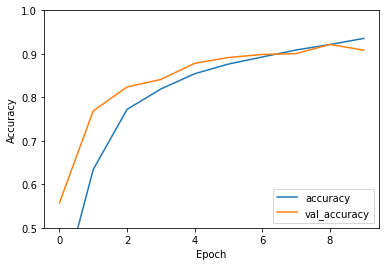

In [29]:
import matplotlib.pyplot as plt
plt.plot(test_run.history['accuracy'], label='accuracy')
plt.plot(test_run.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [41]:
score = model.evaluate(xtest, ytest, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.27733421325683594
Test accuracy: 0.9084967374801636


In [45]:
pred = model.predict(xtest) 
pred = np.argmax(pred, axis = 1)
label = np.argmax(ytest,axis = 1)

print(pred) 
print(label)

91/91 [==============================] - 12s 128ms/step
[6 2 8 ... 8 8 8]
[6 2 8 ... 8 8 8]
